# Pre-processing File

In this notebook, we will pre-process the given ATLAS data to compress the four-momentum of a sample of simulated particles from 4 to 3 variables via an autenconder.

## Extracting relevant data

We iterate over the file line by line. <br>
For each line we form a list of objects. <br>
We extract the jet-particles objects from the list. <br>
We split the jet-particles data into train and test data (80 : 20) <br>

In [1]:
import pandas as pd

# list to store jet particles
jet_objects = []

# open and iterate over file
with open("monojet_Zp2000.0_DM_50.0_chan3.csv", 'r') as f:
    for line in f.readlines():
        object_list = line.split(';')[5:-1] # get objects seperated by ';' in an event
        for objects in object_list:
            obj = objects.split(',')
            if obj[0] == 'j': # check if object is jet-particle
                j_obj = [float(x) for x in obj[1:]]
                jet_objects.append(j_obj)

In [2]:
import numpy as np

# convert list to numpy array
jet_objects = np.array(jet_objects)

In [3]:
from sklearn.model_selection import train_test_split

# split data into train and test with 80:20 ratio
train, test = train_test_split(jet_objects, test_size = 0.2, shuffle = True, random_state = 42)

In [4]:
# view the shape of the original data, train and test data after split
print(jet_objects.shape, train.shape, test.shape)

(22661, 4) (18128, 4) (4533, 4)


## Visualize the data

We convert the train and test data into dataframes. <br>
We then visualize the 4 variables as histograms. <br>
The x axis is the value of the variable and the y axis represents the number of events having that value for that variable. <br>
We also look at some general statistics about the train and test data. <br>

In [5]:
# forming dataframes
train_jet_objects = pd.DataFrame(train, columns = ['E', 'pt', 'eta', 'phi'])
test_jet_objects = pd.DataFrame(test, columns = ['E', 'pt', 'eta', 'phi'])

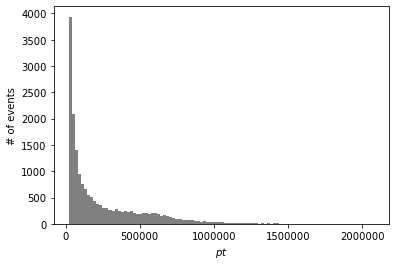

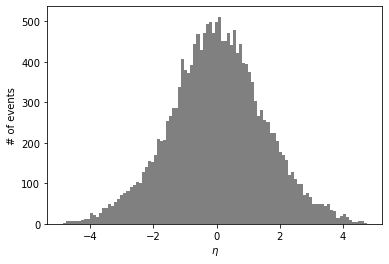

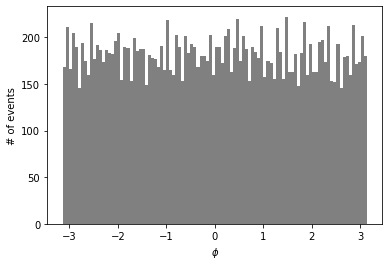

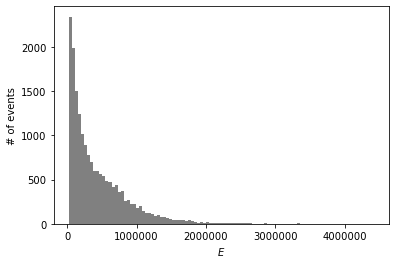

In [6]:
import matplotlib.pyplot as plt

variable_list = [r'$pt$', r'$\eta$', r'$\phi$', r'$E$']

branches=["pt","eta","phi","E"]

n_bins = 100

# creating histograms for each variable
for kk in range(0,4):
    n_hist_data, bin_edges, _ = plt.hist(train_jet_objects[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk])
    plt.ylabel('# of events')
    #plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

In [7]:
# statistics about train data
train_jet_objects.describe()

,E,pt,eta,phi
count,1.812800e+04,1.812800e+04,18128.000000,18128.000000
mean,4.355335e+05,2.417419e+05,0.014890,-0.013126
std,4.279418e+05,2.657371e+05,1.499743,1.810871
min,2.437580e+04,2.208650e+04,-4.870110,-3.141560
25%,1.176178e+05,4.760157e+04,-0.951571,-1.588512
50%,2.927205e+05,1.227590e+05,0.011900,-0.004561
75%,6.254612e+05,3.653140e+05,0.984084,1.534535
max,4.413680e+06,2.073990e+06,4.753080,3.141210


In [8]:
# statistics about test data
test_jet_objects.describe()

,E,pt,eta,phi
count,4.533000e+03,4.533000e+03,4533.000000,4533.000000
mean,4.344664e+05,2.398742e+05,0.000370,-0.009439
std,4.196806e+05,2.679432e+05,1.531436,1.808224
min,2.490270e+04,2.257920e+04,-4.760080,-3.141360
25%,1.201160e+05,4.696520e+04,-0.972851,-1.568540
50%,2.851420e+05,1.177270e+05,0.027528,-0.014145
75%,6.280880e+05,3.589980e+05,1.005710,1.582480
max,3.090610e+06,2.090860e+06,4.692470,3.140110


## Normalization

We normalize the variables as follows:
<ul>
    <li>we take log base 10 of E, i.e., E => log10(E)</li>
    <li>we take log base 10 of pt, i.e., pt => log10(pt)</li>
    <li>we divide eta by 3, i.e., eta => eta/3</li>
    <li>we divide phi by 3, i.e., phi => phi/3</li>
</ul>
We then visualize the normalized variables as histograms. <br>
The x axis is the normalized value of the variable and the y axis represents the number of events having that value for that variable. <br>
We also look at some general statistics about the normalized train and test data. <br>

In [9]:
# function to perform normalization
def normalize_df(df):
    df["E"] = np.log10(df["E"].values)
    df["pt"] = np.log10(df["pt"].values)
    df["eta"] = df["eta"]/3
    df["phi"] = df["phi"]/3

In [10]:
# normalizing the train and test dataframes
normalize_df(train_jet_objects)
normalize_df(test_jet_objects)

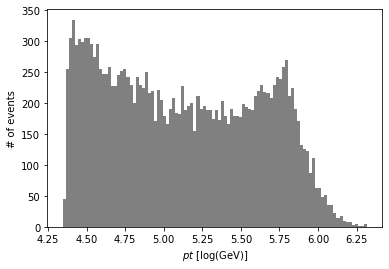

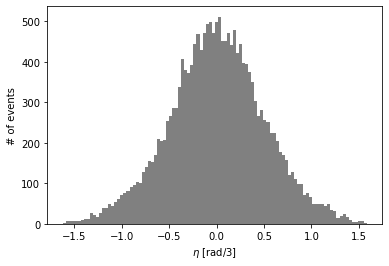

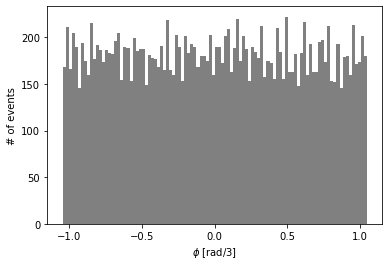

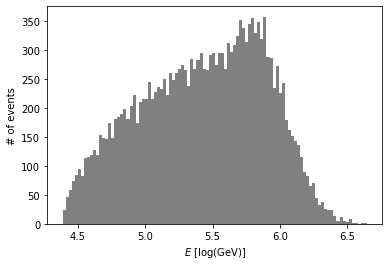

In [11]:
import matplotlib.pyplot as plt

unit_list = ['[log(GeV)]', '[rad/3]', '[rad/3]', '[log(GeV)]']
variable_list = [r'$pt$', r'$\eta$', r'$\phi$', r'$E$']

branches=["pt","eta","phi","E"]

n_bins = 100

# creating histograms for each normalized variable
for kk in range(0,4):
    n_hist_data, bin_edges, _ = plt.hist(train_jet_objects[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('# of events')
    #plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

In [12]:
# statistics about normalized train data
train_jet_objects.describe()

,E,pt,eta,phi
count,18128.000000,18128.000000,18128.000000,18128.000000
mean,5.425894,5.122111,0.004963,-0.004375
std,0.459861,0.491362,0.499914,0.603624
min,4.386959,4.344127,-1.623370,-1.047187
25%,5.070473,4.677621,-0.317190,-0.529504
50%,5.466453,5.089053,0.003967,-0.001520
75%,5.796200,5.562666,0.328028,0.511512
max,6.644801,6.316807,1.584360,1.047070


In [13]:
# statistics about normalized test data
test_jet_objects.describe()

,E,pt,eta,phi
count,4533.000000,4533.000000,4533.000000,4533.000000
mean,5.428397,5.114926,0.000123,-0.003146
std,0.455450,0.492372,0.510479,0.602741
min,4.396246,4.353709,-1.586693,-1.047120
25%,5.079601,4.671776,-0.324284,-0.522847
50%,5.455061,5.070876,0.009176,-0.004715
75%,5.798020,5.555092,0.335237,0.527493
max,6.490044,6.320325,1.564157,1.046703


## Pickle and store data

We pickle the store the dataframes into .pkl files

In [14]:
import pickle as pkl

with open("train_jet_objects.pkl", "wb") as f:
    pkl.dump(train_jet_objects,f)

with open("test_jet_objects.pkl", "wb") as f:
    pkl.dump(test_jet_objects,f)